PHYS52115 Data Acquisition and Image Processing
 
# Data Acquisition Assessment


The data files required for the assessment are in a hidden 'data' area on the Jupyter server. If you wish to work on this assignment without being logged in to the Jupyter server, you can save the data in your own area of the Jupyter server using, for example, 

`numpy.savetxt('Q1_data.txt', [Q1_data, Q1_clock, Q1_time_microseconds]` 

and then download the resulting files to your own computer.

In [39]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy


# Question 1: SPI communications


The pair of signals plotted below are the data signal and clock signal being transmitted as part of the SPI (serial peripheral interface) protocol. 

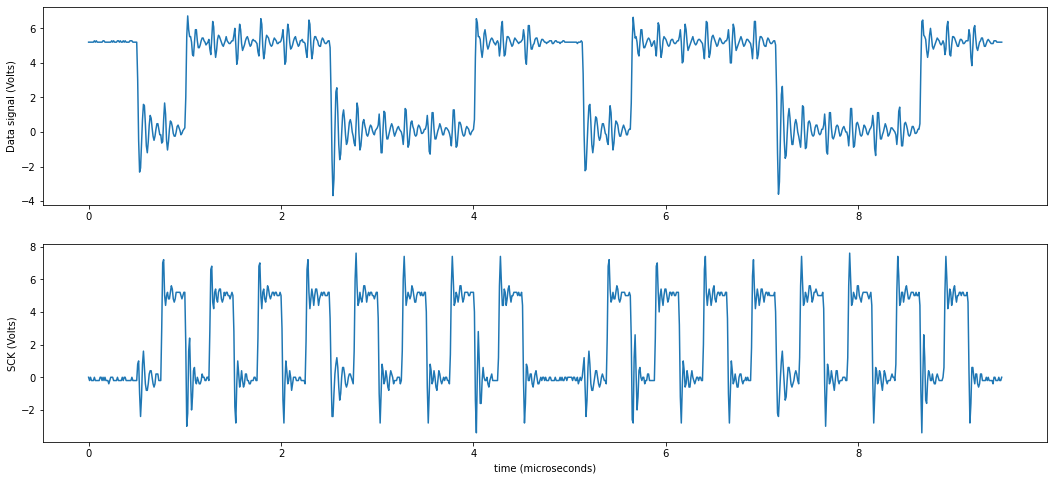

In [40]:
Q1_data, Q1_clock, Q1_time_microseconds = numpy.loadtxt('/data/Q1_data.txt')

#plt.figure(figsize=(12,8))
plt.figure(figsize=(18,8))
plt.subplot(211)
plt.plot(Q1_time_microseconds, Q1_data)
plt.ylabel('Data signal (Volts)')
plt.subplot(212)
plt.plot(Q1_time_microseconds, Q1_clock)
plt.ylabel('SCK (Volts)')
plt.xlabel('time (microseconds)')
plt.show()

(a) Determine the SPI clock frequency. **[1 mark]**

In [41]:
# TODO: any required code here
# In the interval 2-4, We have complete four clocks in 2 microseconds 
# We can find it by getting the actual values of times from Q1_time_microseconds, but usually in spi 
# We use integer values  for the frequency so, 2 MHz is definitely the most convenient answer. 
t = (2*10**-6)/4
f = 1/t
f

2000000.0

Enter your answer for a) below:


2 MHz

(b) Determine the average overall data transfer rate (in bits per second). Comment on the result obtained. **[2 marks]**

In [42]:
# TODO: any required code here
#To find the length of inter-byte separation I will use the whole time stamp 
#As shown in the second plot, we have two streams of 8 clocks with their inter-byte separation 
#By dividing this time over 16 we can get the time required to transfer each bit with considering the missing time 
time = Q1_time_microseconds[-1]-Q1_time_microseconds[0]
timeBit = time/16
dataRate = (1/timeBit)
dataRate*10**6

1685985.2476290835

In [43]:
# Another method to find it, by estimating the inter-byte time which is in the begining of the signal
# But, the first method is better because it depends on two streams instead of only one
idx = (numpy.abs(Q1_data - -1)).argmin()
Q1_time_microseconds[idx]
a = (8*.5 + Q1_time_microseconds[idx])/8
(1/a)*10**6

1659751.0373443982

Enter your answer for b) below:

The average overall data transfer rate is: 

* 1685985 bits per second

This returns mainly to:
* SPI protocol depends on what is called "inter-byte" separation to sperate between to consecutive bytes. 
* By dividing the overall time required to transmit 16 bits by 16, which is avilable in the second plot, we can get the time required for each bit. 
* So the number of overall data transfer rate is less than clock frequency. 

(c) what ascii character code is being transmitted as the data signal, and what letter this corresponds to. Assume that the most significant bit (MSB) is transmitted first. **[2 marks]**

In [44]:
# TODO: any required code here
import binascii
data = '01110001'
n = int('01110001', 2)

b = binascii.unhexlify('%x' % n)
b.decode()


'q'

Enter your answer for c) below:

In [45]:
# YOUR CODE HERE
print (f"The sent code is: {data}")
print (f"The corresponding character is: {b.decode()}")

The sent code is: 01110001
The corresponding character is: q


## Question 2: Synchronised readings

The dataset shown below consists of four datasets collected by simultaneous trigger-synchronised acquisition. 

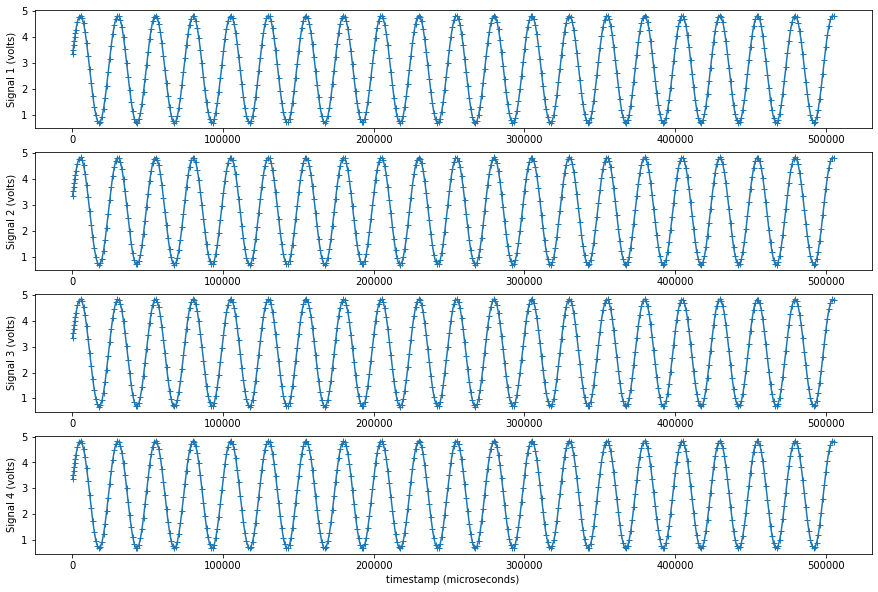

In [46]:
Q2_Ch1, Q2_Ch2, Q2_Ch3, Q2_Ch4, Q2_time_microseconds = numpy.loadtxt('/data/Q2_data.txt')

plt.figure(figsize=(15,10)) 
plt.subplot(411)
plt.plot(Q2_time_microseconds, Q2_Ch1, marker='+')
plt.ylabel('Signal 1 (volts)')
plt.subplot(412)
plt.plot(Q2_time_microseconds, Q2_Ch2, marker='+')
plt.ylabel('Signal 2 (volts)')
plt.subplot(413)
plt.plot(Q2_time_microseconds, Q2_Ch3, marker='+')
plt.ylabel('Signal 3 (volts)')
plt.subplot(414)
plt.plot(Q2_time_microseconds, Q2_Ch4, marker='+')
plt.ylabel('Signal 4 (volts)')
plt.xlabel('timestamp (microseconds)')
plt.show()

(a) Determine the sample-rate for a single channel (in samples per second) **[2 marks]**

In [47]:
#### TODO: any required code here
sampleTime = ((Q2_time_microseconds[-1]-Q2_time_microseconds[0])*10**-6)/len(Q2_time_microseconds)
sampleRate = 1/sampleTime
sampleRate

990.0362749291137

Enter your answer for a) below:

990 Samples per second

(b) Explain what is meant by the Nyquist frequency, and determine the Nyquist frequency for this measurement **[2 marks]** 

In [48]:
# TODO: any required code here
ns = sampleRate/2
ns

495.01813746455684

Enter your answer for b) below


What is the Nyquist frequency?
* It is the highest frequency signal component that can be sampled without aliasing issue for a given sample rate. 
* So, if I have, already, result from an experiment I can get the Nyquist frequency by dividing this sampling rate by two.
* This helps me in detecting the highest possible frequency to sample using this sample rate. 

What is the  Nyquist frequency in our case? 
* Nyquist frequency = sample rate/2 =  495.018 Hz. 

(c) In reality the datasets are not perfectly synchronised. Determine and standard deviation of the time delay between channels, which is a measure of how well synchronised are the readings. **[6 marks]**

In [49]:
# TODO: any required code here
signals = numpy.empty((len(Q2_Ch1),4))
signals[:,0] = Q2_Ch1
signals[:,1] = Q2_Ch2
signals[:,2] = Q2_Ch3
signals[:,3] = Q2_Ch4
def FFT(signal, time, plot=True):
    '''
    Determine and plot (positive frequency) FFT of signal with timebase time (both numpy arrays).
    Returns frequency and amplitude of (non-zero frequency) fundamental tone.
    '''
    try:
        from scipy.fft import fft
    except ModuleNotFoundError:
        from scipy.fftpack import fft  
    import numpy as np
    
    fft_signal = fft(signal) # complex FFT spectrum
    
    yf = 2.0/len(signal) * np.abs(fft_signal[:len(signal)//2])[1:] 
    xf = np.linspace(0.0, len(time)/(2.0*(time[-1]-time[0])), len(time)//2)[1:] 
    phase = np.angle(fft_signal[1:len(signal)//2]) + np.pi/2
    
    peak_freq = xf[np.argmax(yf)]
    amplitude = np.max(yf)
    
    if plot:
        plt.figure(figsize=(6,3))
        plt.plot(xf, yf)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude')
        plt.show()

        print('Fundamental frequency at {} Hz, with amplitude {} V.'.format(peak_freq, amplitude))
        print('Nyquist frequency as last point in FFT = {}'.format(xf[-1]))

    return xf, yf, phase

from scipy.signal import find_peaks

f = numpy.zeros((4, len(Q2_time_microseconds)//2 -1), dtype=numpy.float64)
a = numpy.zeros_like(f)
ph = numpy.zeros_like(a)
freqs = numpy.zeros((4,), dtype=numpy.float64)
amps = numpy.zeros_like(freqs)
phases = numpy.zeros_like(freqs)

for i in range(4): # determine the frequency and phase of the first peak for each channel
    f[i,:], a[i,:], ph[i,:] = FFT(signals[:,i], Q2_time_microseconds*10**-6, plot = False)
    maximum, _ = find_peaks(a[i], height=0.02)
    amps[i] = a[i, maximum[0]]
    freqs[i] = f[i, maximum[0]]
    phases[i] = ph[i, maximum[0]]

delays = phases/2/numpy.pi/freqs
difference = numpy.diff(delays)*1000   
std = numpy.std(difference)
print(f"The standard deviation of the time delay between channels is: {std} ms")    
print(f"The standard deviation of the absolute values of time delay between channels is: {numpy.std(numpy.abs(difference))} ms")    


The standard deviation of the time delay between channels is: 0.00036291544329774384 ms
The standard deviation of the absolute values of time delay between channels is: 0.0001845235001534077 ms


In [50]:
from scipy.optimize import curve_fit
times = Q2_time_microseconds*10**-6
def fit_function(x, v_offset, amp, freq, phase):
    return v_offset + amp*numpy.sin(2*numpy.pi*freq*x + phase)

frequency_ = []
phase_ = []
#plt.figure(figsize = (10,8))
for i in range(4):
    # sensible starting values:
    p0 = [numpy.mean(signals[:,i]), # average voltage offset
          amps[i],                  # FFT peak amplitude
          freqs[i],                 # FFT peak frequency
          phases[i]]                # FFT peak phase
    
    # sensible bounds on the parameters:
    bounds = [[0,                   # offset 0 - 5
               0,                   # amplitude 0 - 5
               30,                   # frequency 0 - Nyquist
               0.5],                  # phase 0 - 2pi
              [5.0, 5.0, 1/(2.0*(times[1]- times[0])), 2*numpy.pi]]  
    
    # do the fit - note we won't worry about error-bars here.
    popt, _= curve_fit(fit_function, times, signals[:,i], p0=p0, bounds = bounds)
    frequency_.append(popt[2])
    phase_.append(popt[3])

freq = numpy.array(frequency_)
phase = numpy.array(phase_)
print(phase)
delays_ = phase/2/numpy.pi/freq
difference_ = numpy.diff(delays_)*1000
std_ = numpy.std(difference_)
print(f"The standard deviation of the time delay between channels is: {std_} ms")

[0.5 0.5 0.5 0.5]
The standard deviation of the time delay between channels is: 9.257110144915991e-07 ms


Enter your answer for c) below

As shown above, I depend on finding the value of the standard deviation of the time delay between channels on two approaches: 

1) FFT: and I got standard deviation with the value of 0.000363 ms. 

2) Fitting the signals depending on FFT variables: and I got value of: 9.257e-07 ms. 

The second value is so far from the value of FFT, this returns to a misfit in the phases 

I will consider only FFT approach as it has more reliable results:

* So, The standard deviation of the time delay between channels is: 0.000363 ms.
* The standard deviation of the absolute values of time delay between channels is: 0.00018 ms

# Question 3: Sequential readings

The set of data shown below are acquired sequentially from 4 analog voltage inputs connected to the same input signal waveform. The timestamp is taken immediately on capturing the first signal (Ch1), so the delay between channels is not directly quantified. 

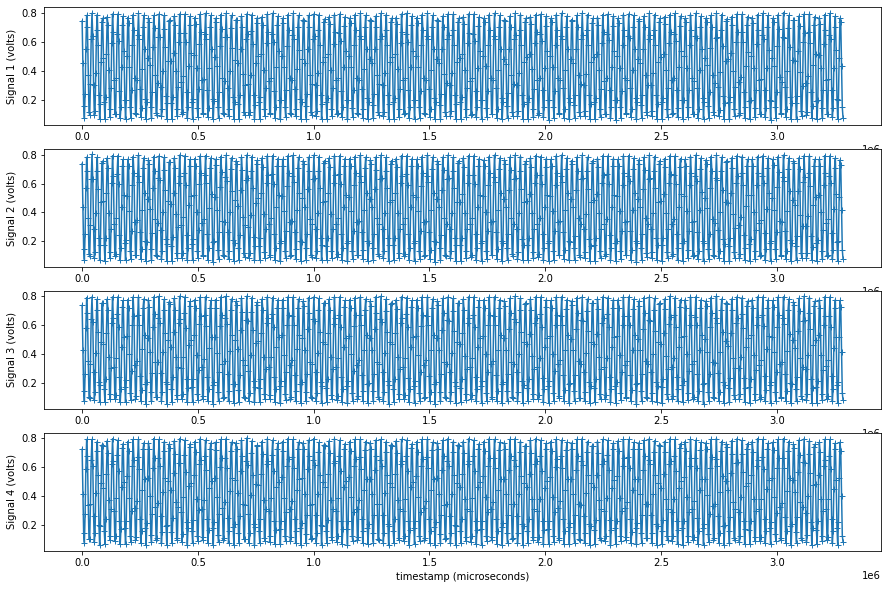

In [51]:
Q3_Ch1, Q3_Ch2, Q3_Ch3, Q3_Ch4, Q3_time_microseconds = numpy.loadtxt('/data/Q3_data.txt')

plt.figure(figsize=(15,10)) 
plt.subplot(411)
plt.plot(Q3_time_microseconds, Q3_Ch1, marker='+')
plt.ylabel('Signal 1 (volts)')
plt.subplot(412)
plt.plot(Q3_time_microseconds, Q3_Ch2, marker='+')
plt.ylabel('Signal 2 (volts)')
plt.subplot(413)
plt.plot(Q3_time_microseconds, Q3_Ch3, marker='+')
plt.ylabel('Signal 3 (volts)')
plt.subplot(414)
plt.plot(Q3_time_microseconds, Q3_Ch4, marker='+')
plt.ylabel('Signal 4 (volts)')
plt.xlabel('timestamp (microseconds)')
plt.show()

(a) Determine the average time delay between voltage measurements on adjacent channels. **[2 marks]**

In [52]:
# TODO: any required code here
signals1 = numpy.empty((len(Q3_Ch1),4))
signals1[:,0] = Q3_Ch1
signals1[:,1] = Q3_Ch2
signals1[:,2] = Q3_Ch3
signals1[:,3] = Q3_Ch4

f = numpy.zeros((4, len(Q3_time_microseconds)//2 -1), dtype=numpy.float64)
a = numpy.zeros_like(f)
ph = numpy.zeros_like(a)
freqs = numpy.zeros((4,), dtype=numpy.float64)
amps = numpy.zeros_like(freqs)
phases = numpy.zeros_like(freqs)

for i in range(4): # determine the frequency and phase of the first peak for each channel
    f[i,:], a[i,:], ph[i,:] = FFT(signals1[:,i], Q3_time_microseconds*10**-6, plot = False)
    maximum, _ = find_peaks(a[i], height=0.02) 
    amps[i] = a[i, maximum[0]]
    freqs[i] = f[i, maximum[0]]
    phases[i] = ph[i, maximum[0]]

print('channel phases (radians):', phases, '\n')

delays = phases/2/numpy.pi/freqs
offsets = numpy.diff(delays)*1000
print(delays)
print('channel offsets (ms):', offsets)
print('average offsets (ms):', numpy.average(offsets))


channel phases (radians): [0.80475513 0.83675561 0.86823281 0.90016552] 

[0.00283565 0.00294841 0.00305932 0.00317184]
channel offsets (ms): [0.11275753 0.11091368 0.11251873]
average offsets (ms): 0.11206331481051439


Enter your answer for a) below:

- The average time delay between voltage measurements on adjacent channels is: 0.1121 ms. 

(b) Using this average time separation, combine all four datasets into one, with an increased effective sampling rate. Plot (approximately) the first 2 cycles of the signal with a suitable fit to the new dataset. **[3 marks]**

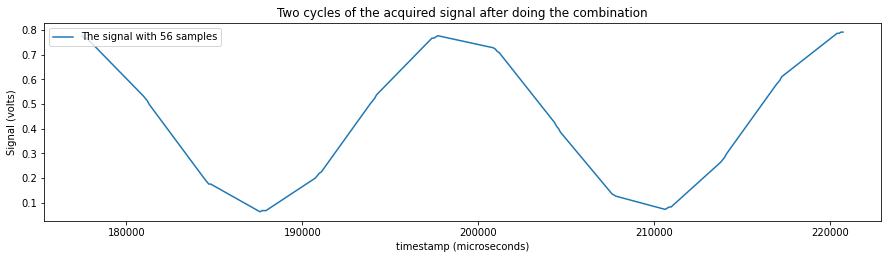

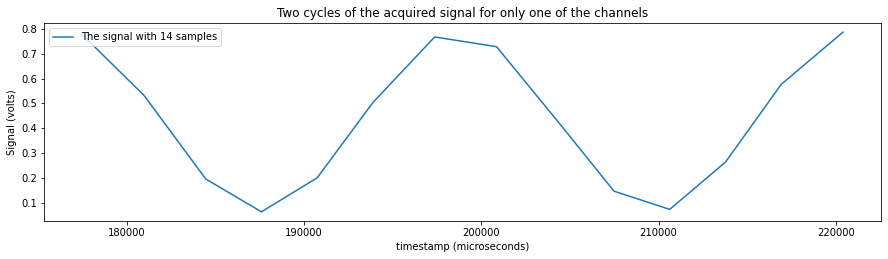

In [53]:
# TODO: any required code here
# TODO: any required code here
#Prepare new timestamp depending on the average time separation.
averageus = numpy.average(offsets)*1000
times = numpy.empty((len(Q3_time_microseconds),4))
times[:,0] = Q3_time_microseconds # I consider the first channel as the reference 
times[:,1] = Q3_time_microseconds +averageus 
times[:,2] = Q3_time_microseconds + 2*averageus
times[:,3] = Q3_time_microseconds + 3*averageus


#I found the value of the frequency using fft implicitly, just to make a code with fewer lines
fundemental_frequency = 45.168
Period = (1/fundemental_frequency)*10**6

#To find the index of the borders of the period
def find_nearest(array, value):
    array = numpy.asarray(array)
    idx = (numpy.abs(array - value)).argmin()
    return idx

#I choose 10*period - 8*period to avoid any probable transient effects at the begining of the signal. 
idx1 = find_nearest(times[:,0], 8*Period)
idx11 = find_nearest(times[:,0], 10*Period)
idx2 = find_nearest(times[:,1], 8*Period)
idx22 = find_nearest(times[:,1], 10*Period)
idx3 = find_nearest(times[:,2], 8*Period)
idx33 = find_nearest(times[:,2], 10*Period)
idx4 = find_nearest(times[:,3], 8*Period)
idx44 = find_nearest(times[:,3], 10*Period)
overallSignal = numpy.concatenate((signals1[idx1:idx11+1,0],signals1[idx2:idx22+1,1],\
                                   signals1[idx3:idx33+1,2],signals1[idx4:idx44+1,3]))
overallTime = numpy.concatenate((times[idx1:idx11+1,0],times[idx2:idx22+1,1],\
                                 times[idx3:idx33+1,2],times[idx4:idx44+1,3]))

#Make sorting process by utilizing zip datatype
overallTime,overallSignal = zip(*sorted(zip(overallTime,overallSignal)))

#Plotting the figure after combination process 
plt.figure(figsize = (15,8))
plt.subplot(211)
plt.plot(overallTime,overallSignal, label = f"The signal with {len(overallTime)} samples")
plt.ylabel('Signal (volts)')
plt.xlabel('timestamp (microseconds)')
plt.title("Two cycles of the acquired signal after doing the combination")
plt.legend(loc="upper left")
plt.show()
#Plotting the figure before combination process for only one channel
plt.figure(figsize = (15,8))
plt.subplot(211)
plt.plot(times[idx1:idx11+1,0],signals1[idx1:idx11+1,0],\
         label = f"The signal with {len(times[idx1:idx11+1,0])} samples")
plt.ylabel('Signal (volts)')
plt.xlabel('timestamp (microseconds)')
plt.title("Two cycles of the acquired signal for only one of the channels")
plt.legend(loc="upper left")
plt.show()


Enter your answer for b) below:

As shown in the above figures:
- After the combination process we have 56 samples to count on instead of only 14 samples before.
- This enhances the from the quality of the acquired signal and makes it more realistic and smooth. 